Length of x: 1258
Length of y: 1258


C:\Users\Spark\AppData\Local\Temp\ipykernel_112724\1165493384.py:62: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=dates[-1], periods=forecast_periods + 1, closed='right')


ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

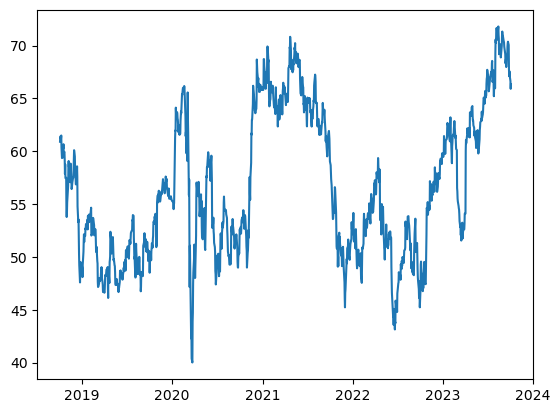

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define a function to read historical stock price data from a CSV file
def read_stock_data_from_csv(csv_filename):
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_filename)

        # Ensure that the DataFrame has 'Date' and 'Close' columns
        if 'Date' in df.columns and 'Adj Close' in df.columns:
            # Convert the 'Date' column to datetime type
            df['Date'] = pd.to_datetime(df['Date'])

            # Sort the DataFrame by date (if not already sorted)
            df.sort_values(by='Date', inplace=True)

            # Return the DataFrame with 'Date' as the index
            df.set_index('Date', inplace=True)

            return df
        else:
            raise ValueError("CSV file must contain 'Date' and 'Close' columns.")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        return None

# Define a function to compute a simple linear projection
# Modify the compute_forecast function
def compute_forecast(data):
    x = range(len(data))
    y = data
    print(f"Length of x: {len(x)}")
    print(f"Length of y: {len(y)}")
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    forecast = slope * (x[-1] + 1) + intercept
    return forecast  # Return a single value, not a list



# Define a function to generate the forecast chart
def forecast_chart(csv_filename, series_id, start_date, end_date):
    stock_data = read_stock_data_from_csv(csv_filename)

    
    
    
    
    if stock_data is not None:
        dates = stock_data.index
        data = stock_data['Adj Close']

        plt.plot(dates, data, label='observed')

        # Compute the forecast
        forecast = compute_forecast(data)

        # Create forecast dates
        forecast_dates = pd.date_range(start=dates[-1], periods=forecast_periods + 1, closed='right')

        # Plot forecast
        plt.plot(forecast_dates, forecast, label='projected')
        plt.title(series_id)

        # Only try to plot forecast if there is historical data
        if len(data) > 0:
            historical_end_date = dates[-1].strftime('%Y-%m-%d')
            forecast_start_date = (dates[-1] + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
            forecast_end_date = end_date
            fig, ax = plt.subplots(figsize=(20, 9))

            # Get historical data for forecasting
            historical_data = stock_data[stock_data.index <= historical_end_date]['Adj Close']

            # Compute the forecast
            forecast = compute_forecast(historical_data)

            # Create forecast dates (only one point in the future)
            forecast_dates = [pd.Timestamp(forecast_end_date)]

            # Convert forecast and forecast_dates to numpy arrays
            forecast = np.array(forecast)
            forecast_dates = np.array(forecast_dates)

            # Plot forecast (since there's only one point in the future)
            ax.plot(forecast_dates, forecast, 'ro', label='Projected ' + series_id)  # 'ro' for red circle marker
        plt.legend()
        plt.show()


# Example usage:
if __name__ == "__main__":
    # Replace 'your_stock_data.csv' with the actual CSV filename
    csv_filename = 'D:/mainline/machinelearning/ChatGPT_ThetaSandbox/jupyter_notebooks/financialanalysistools/output/test.csv'
    series_id = 'EHC'
    start_date = '2018-10-04'
    end_date = '2023-10-4'
    forecast_periods = 20

    forecast_chart(csv_filename, series_id, start_date, end_date)


In [15]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define function to forecast time series data using ARIMA model and plot the results
def forecast_time_series(data, steps):
    # Create the ARIMA model
    model = ARIMA(data, order=(1, 1, 1))

    # Fit the model to the data
    model_fit = model.fit()

    # Forecast the next n steps of data
    forecast = model_fit.forecast(steps=steps)

    # Combine the historical data with the forecast
    full_data = pd.concat([data, forecast.to_frame('FORECAST')], axis=0)

    # Visualize the historical data and forecast
    plt.plot(full_data)
    plt.legend(full_data.columns)
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title('Price Time Series Forecast')
    plt.show()

# Load CSV data into a DataFrame
data = pd.read_csv('D:/mainline/machinelearning/ChatGPT_ThetaSandbox/jupyter_notebooks/financialanalysistools/output/test.csv')

# Rename the columns to match the expected format
data.rename(columns={'Date': 'Date', 'Adj Close': 'Adj Close'}, inplace=True)

# Forecast the next 20 periods of data
forecast_time_series(data, steps=10)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereDate          object
Adj Close    float64
Volume         int64
Open          object
High          object
Low           object
dtype: object and None. The data was
            Date  Adj Close   Volume     Open     High      Low
0      10/4/2018    60.9000   409062  $61.55   $61.70   $60.74 
1      10/5/2018    61.3955  1070455  $60.74   $62.03   $60.74 
2      10/8/2018    61.2037   442481  $61.36   $61.67   $60.36 
3      10/9/2018    61.4914  1027743  $61.22   $62.15   $61.22 
4     10/10/2018    60.3247   830844  $61.73   $62.02   $60.32 
...          ...        ...      ...      ...      ...      ...
1253   9/28/2023    67.5700   601047  $67.56   $68.01   $66.88 
1254   9/29/2023    67.1600   597851  $67.65   $67.84   $66.90 
1255   10/2/2023    66.6500   551176  $66.89   $66.98   $66.21 
1256   10/3/2023    65.9100   752910  $66.63   $66.89   $65.82 
1257   10/4/2023    66.3500   493114  $65.90   $66.39   $65.40 

[1258 rows x 6 columns]
and
 None
before. After,
[['10/4/2018' 60.9 409062 '$61.55 ' '$61.70 ' '$60.74 ']
 ['10/5/2018' 61.3955 1070455 '$60.74 ' '$62.03 ' '$60.74 ']
 ['10/8/2018' 61.2037 442481 '$61.36 ' '$61.67 ' '$60.36 ']
 ...
 ['10/2/2023' 66.65 551176 '$66.89 ' '$66.98 ' '$66.21 ']
 ['10/3/2023' 65.91 752910 '$66.63 ' '$66.89 ' '$65.82 ']
 ['10/4/2023' 66.35 493114 '$65.90 ' '$66.39 ' '$65.40 ']]
None.

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Spark\AppData\Local\Temp\ipykernel_112724\30396

ValueError: x and y must have same first dimension, but have shapes (19,) and (20,)

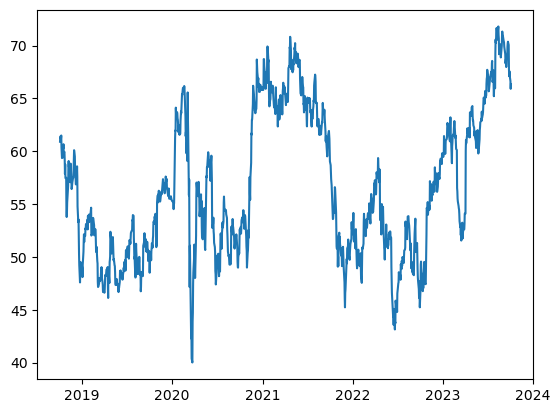

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define a function to read historical stock price data from a CSV file
# (same as your original function)

# Define a function to generate the forecast chart using ARIMA
def forecast_chart_arima(csv_filename, series_id, start_date, end_date, forecast_periods):
    stock_data = read_stock_data_from_csv(csv_filename)

    if stock_data is not None:
        dates = stock_data.index
        data = stock_data['Adj Close']

        plt.plot(dates, data, label='observed')

        # Create the ARIMA model
        model = ARIMA(data, order=(1, 1, 1))  # You can adjust the order as needed

        # Fit the model to the data
        model_fit = model.fit()

        # Forecast the next n periods
        forecast = model_fit.forecast(steps=forecast_periods)

        # Create forecast dates
        forecast_dates = pd.date_range(start=dates[-1], periods=forecast_periods, closed='right')

        # Plot forecast
        plt.plot(forecast_dates, forecast, label='projected')
        plt.title(series_id)

        plt.legend()
        plt.show()

# Example usage:
if __name__ == "__main__":
    csv_filename = 'D:/mainline/machinelearning/ChatGPT_ThetaSandbox/jupyter_notebooks/financialanalysistools/output/test.csv'
    series_id = 'EHC'
    start_date = '2018-10-04'
    end_date = '2023-10-04'
    forecast_periods = 20

    forecast_chart_arima(csv_filename, series_id, start_date, end_date, forecast_periods)
